In [114]:
import numpy as np
import matplotlib.pyplot as plt

##define the environment

In [115]:
#define true probability
true_prob = [0.3,0.5,0.7]
n_arms = len(true_prob)
n_steps = 100
epsilon = 0.3

##bandit reward funtion

In [116]:
def pull_arm(arm):
  return 1 if np.random.rand() < true_prob[arm] else 0

##initialise

In [117]:
estimates = np.zeros(n_arms)
counts = np.zeros(n_arms)
total_rewards = []
chosen_arms = []

##epsilon greedy algorithm

In [118]:
for step in range(n_steps):
  if np.random.rand() < epsilon: #explore
    arm=np.random.choice(n_arms)
  else:
    arm=np.argmax(estimates) #exploit
  reward=pull_arm(arm)

  reward = pull_arm(arm)
  estimates[arm]=(counts[arm]*estimates[arm]+reward)/(counts[arm]+1)
  counts[arm]+=1
  total_rewards.append(reward)
  chosen_arms.append(arm)

In [119]:
#calculate cummulatuive average reward
cumulative_avg_reward=np.cumsum(total_rewards)/(np.arange(n_steps)+1)

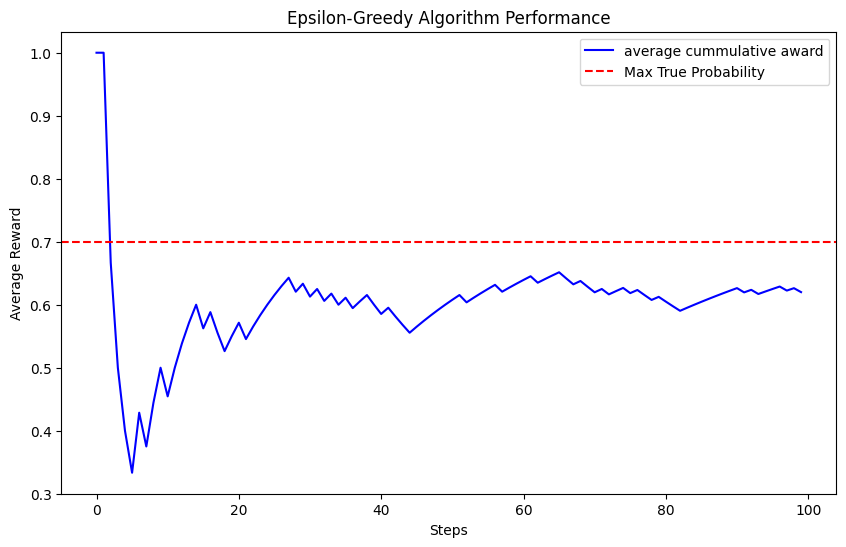

In [120]:
#visulaisation of epsilon greedy algorithm
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(cumulative_avg_reward, label='average cummulative award', color='blue')
ax.axhline(y=max(true_prob), color='red', linestyle='--', label='Max True Probability')
ax.set_xlabel('Steps')
ax.set_ylabel('Average Reward')
ax.set_title('Epsilon-Greedy Algorithm Performance')
ax.legend()
plt.show()